# WEEK 10 (10 December)

### Objectives
* Create distance matrix for all the locations $\checkmark$
* Do hierarchical agglomerative clustering $\checkmark$
* Figure out how many levels we want etc.
* Produce OD matrices for different levels of clustering $\checkmark$

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas 
from matplotlib import pyplot as plt
from hm.pop_models.pop_explicit import explicit as pop_explicit
from hm.hm_models.gravity import gravity
from hm.hm_models.radiation import radiation
from hm.coarse_grain import clustering, coarse_matrix
import seaborn as sns; sns.set()

In [7]:
df = pandas.read_csv("/Users/Ilaria/Documents/Imperial/MSci_Project/Code/human_mob/data/CDRC/england_welsh_scotland_pwc2011.csv")
x = np.array(df)[:,5]
y = np.array(df)[:,6]
m = np.array(df)[:,2]
xy = np.array([x, y])
xy = np.transpose(xy)
p = pop_explicit(xy, m)

We use hierarchical agglomerative clustering to cluster the locations.

Let's try with different distance thresholds (these are 

In [39]:
d_max = 2000.
cluster_1 = clustering.Clusters(p, d_max)

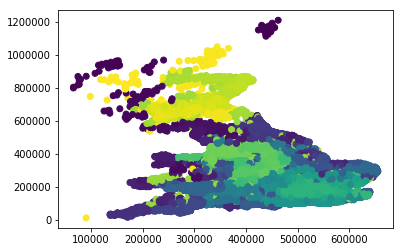

In [40]:
cluster_1.viz_clusters()

## London

Let's get all the locations within a rectangle containing London:

In [8]:
lon_df = df[df['Easting'] < 561966][df['Easting'] > 493024][df['Northing'] < 207218][df['Northing'] > 150912]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Now let's create a population distribution with the data within this rectangle

In [9]:
x_lon = np.array(lon_df)[:,5]
y_lon = np.array(lon_df)[:,6]
m_lon = np.array(lon_df)[:,2]
xy_lon = np.array([x_lon, y_lon])
xy_lon = np.transpose(xy_lon)
p_lon = pop_explicit(xy_lon, m_lon)

and let's run the clustering algorithm until every cluster has a maximum distance of 5000

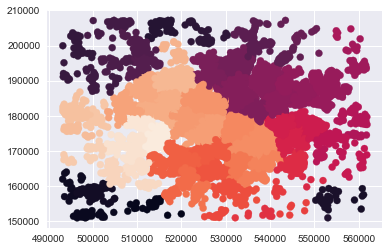

This results in 82 clusters.


In [14]:
d_max = 5000
lon_clusters = clustering.Clusters(p_lon, d_max)
lon_clusters.viz_clusters()
print ("This results in " + str(lon_clusters.clusters_num) + " clusters.")

### OD Matrices with different levels of clustering

Let's get some heatmaps of the ODMs for three different levels of clustering

In [8]:
xy_1 = lon_clusters.centroids()
m_1 = lon_clusters.clustered_pop
lon_1 = pop_explicit(xy_1, m_1)
g_lon1 = gravity(lon_1, 1, 1, 0.2)

d_max = 7000
lon_clusters_2 = clustering.Clusters(p_lon, d_max)
xy_2 = lon_clusters_2.centroids()
m_2 = lon_clusters_2.clustered_pop
lon_2 = pop_explicit(xy_2, m_2)
g_lon2 = gravity(lon_2, 1, 1, 0.2)

d_max = 10000
lon_clusters_3 = clustering.Clusters(p_lon, d_max)
xy_3 = lon_clusters_3.centroids()
m_3 = lon_clusters_3.clustered_pop
lon_3 = pop_explicit(xy_3, m_3)
g_lon3 = gravity(lon_3, 1, 1, 0.2)

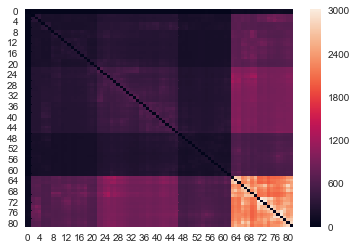

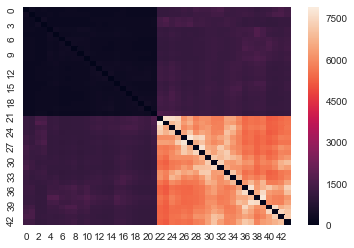

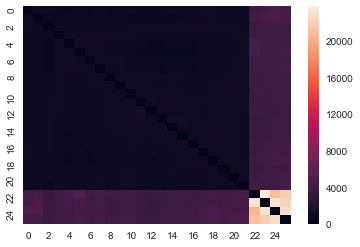

In [9]:
sns.heatmap(g_lon1.ODM())
plt.show()
sns.heatmap(g_lon2.ODM())
plt.show()
sns.heatmap(g_lon3.ODM())
plt.show()

These aren't particularly meaningful since we don't know how the clusters are distributed (those close in the matrix might not actually be physically close. 

So we need to rearrange the matrix by moving together locations that have been clustered. 
This way we can compare ODMs before clustering and after (by creating a new population instance where each cluster is a locations).

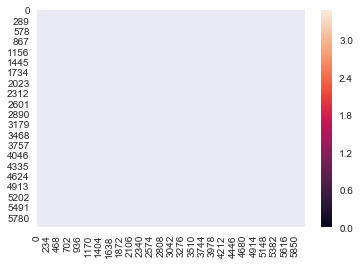

In [15]:
g_lon = gravity(p_lon, 1, 1, 0.2)
sns.heatmap(g_lon.ODM())
plt.show()

In [28]:
ODM = g_lon.ODM()
clusters_index = lon_clusters.clusters
coarse_matrix.reorder_matrix(ODM, clusters_index)

KeyboardInterrupt: 